# Basic model training with keras
####  ----------------------------------------------------------------------------- Sai Charan

In [ ]:
!unzip "/content/drive/My Drive/Data.zip"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255,fill_mode = "nearest",validation_split=0.3)

In [ ]:
train_gen = datagen.flow_from_directory("/content/Data/Train",target_size = (150,150),class_mode = 'binary',subset = 'training')
test_gen = datagen.flow_from_directory("/content/Data/Train",target_size=(150,150),class_mode = 'binary',subset = 'validation')

Found 6630 images belonging to 2 classes.
Found 2841 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (2,2), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPool2D(2,),
        tf.keras.layers.Conv2D(32,(2,2),activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2), 
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(1024, activation='relu'), 
        tf.keras.layers.Dense(512, activation='relu'), 
        tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.compile(optimizer = 'adamax',metrics=['accuracy'],loss = 'binary_crossentropy')

In [ ]:
history = model.fit_generator(train_gen,epochs = 20,validation_data=test_gen,verbose=1)

Epoch 1/20
208/208 [==============================] - 27s 130ms/step - loss: 0.6749 - accuracy: 0.5733 - val_loss: 0.6669 - val_accuracy: 0.5780
Epoch 2/20
208/208 [==============================] - 27s 129ms/step - loss: 0.6132 - accuracy: 0.6617 - val_loss: 0.5714 - val_accuracy: 0.7068
Epoch 3/20
208/208 [==============================] - 27s 129ms/step - loss: 0.5530 - accuracy: 0.7131 - val_loss: 0.6401 - val_accuracy: 0.6311
Epoch 4/20
208/208 [==============================] - 27s 131ms/step - loss: 0.5022 - accuracy: 0.7540 - val_loss: 0.5056 - val_accuracy: 0.7462
Epoch 5/20
208/208 [==============================] - 27s 128ms/step - loss: 0.4627 - accuracy: 0.7840 - val_loss: 0.5220 - val_accuracy: 0.7501
Epoch 6/20
208/208 [==============================] - 27s 129ms/step - loss: 0.4330 - accuracy: 0.7970 - val_loss: 0.4849 - val_accuracy: 0.7557
Epoch 7/20
208/208 [==============================] - 27s 129ms/step - loss: 0.3967 - accuracy: 0.8246 - val_loss: 0.4777 - val_ac

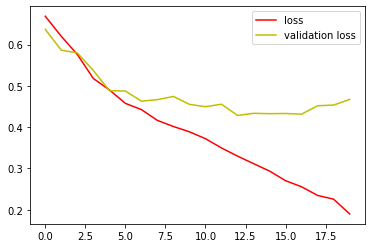

<Figure size 432x288 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,loss,'r',label = 'loss')
plt.plot(epochs,val_loss,'y',label = 'validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import pandas as pd
test = pd.read_csv("/content/Data/Sample_Submission.csv")

In [ ]:
preds = []
from tensorflow.keras.preprocessing import image
import numpy as np
for i in test['File_Name'].values:
  k = image.load_img('/content/Data/Test/'+i,target_size = (150,150))
  t = image.img_to_array(k)
  t = np.expand_dims(t,axis = 0)
  bin = model.predict(t)
  preds.append(int(bin))

In [ ]:
test['Category'] = preds

In [ ]:
test

,File_Name,Category
0,8121.jpg,0
1,15486.jpg,1
2,8132.jpg,0
3,16297.jpg,1
4,20838.jpg,1
...,...,...
4054,15376.jpg,0
4055,19489.jpg,1
4056,9762.jpg,0
4057,1423.jpg,0


In [ ]:
test.to_excel('submit5.xlsx',index = False)